# Sentiment Analysis

In [4]:
from bs4 import BeautifulSoup
import requests
import os
from os import path
import re
import pandas as pd
import numpy as np
from textblob import TextBlob
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter

## Helper functions

### Remove apostrophies from negotiations (don't, haven't, ...)

In [5]:
def write_out_negotiations(text):
    
    # haven't, hasn't

    text = re.sub("haven't", "have not", text)
    text = re.sub("Haven't", "Have not", text)
    text = re.sub("hasn't", "has not", text)
    text = re.sub("Hasn't", "Has not", text)

    ## isn't, can't, don't

    text = re.sub("mustn't", "must not", text)
    text = re.sub("Mustn't", "Must not", text)

    text = re.sub("can'", "can not", text)
    text = re.sub("Can't", "Can not", text)

    text = re.sub("isn't", "is not", text)
    text = re.sub("Isn't", "Is not", text)

    text = re.sub("aren't", "are not", text)
    text = re.sub("Aren't", "Are not", text)

    text = re.sub("don't", "do not", text)
    text = re.sub("Don't", "Do not", text)

    text = re.sub("doesn't", "does not", text)
    text = re.sub("doesn't", "does not", text)

    text = re.sub("didn't", "did not", text)
    text = re.sub("Didn't", "Did not", text)

    ## wasn't, won't

    text = re.sub("wasn't", "was not", text)
    text = re.sub("Wasn't", "Was not", text)

    text = re.sub("won't", "will not", text)
    text = re.sub("Won't", "Will not", text)

    ## wouldn't, couldn't

    text = re.sub("couldn't", "could not", text)
    text = re.sub("shouldn't", "should not", text)
    
    text = re.sub("“", "", text)
    text = re.sub("”", "", text)
    
    text = re.sub(r"\.", "", text)
    text = re.sub(";", "", text)
    text = re.sub(",", "", text)
    
    text = re.sub(r"\s\s", " ", text)
    text = text.strip()
    
    return text

## Single line plots

In [111]:
def make_line_plot(character):
    plt.figure(figsize=(15,2))
    sns.set_style("darkgrid")
    lineplot = sns.lineplot(x="Number", y="Polarity", color="darkblue", linewidth=1,
                 data=character)
    lineplot.set_title(f"Sentiment Analysis", fontsize=17, fontweight="bold")
    lineplot.set_xlabel("Verlauf", fontsize=15, fontweight="bold")
    lineplot.set_ylabel("Polarity Index", fontsize=12, fontweight="bold")
    lineplot.axhline(0, color="black", ls="--")

In [6]:
# get list with all characters
characters_list = ["frodo", "gandalf", "sam", "merry", "pippin", "aragorn", "arwen", "eowyn", "legolas", "gimli", "theoden", "saruman", "gollum", "smeagol", "sauron"]

In [7]:
with open("data/gandalf.txt") as f:
    gandalf = f.read()
    gandalf = write_out_negotiations(gandalf)
    gandalf_300_start_list = gandalf.split(' ')[:300]
    gandalf_300_end_list = gandalf.split(' ')[-300:]
    
    gandalf_300_start = ""
    for word in gandalf_300_start_list:
        gandalf_300_start += f'{word} '
    
    gandalf_300_end = ""
    for word in gandalf_300_end_list:
        gandalf_300_end += f'{word} '
        
with open("data/frodo.txt") as f:
    frodo = f.read()
    frodo = write_out_negotiations(frodo)
    frodo_300_start_list = frodo.split(' ')[:300]
    frodo_300_end_list = frodo.split(' ')[-300:]
        
    frodo_300_start = ""
    for word in frodo_300_start_list:
        frodo_300_start += f'{word} '
    
    frodo_300_end = ""
    for word in frodo_300_end_list:
        frodo_300_end += f'{word} '
        
with open("data/sam.txt") as f:
    sam = f.read()
    sam = write_out_negotiations(sam)
    sam_300_start_list = sam.split(' ')[:300]
    sam_300_end_list = sam.split(' ')[-300:]
            
    sam_300_start = ""
    for word in sam_300_start_list:
        sam_300_start += f'{word} '
    
    sam_300_end = ""
    for word in sam_300_end_list:
        sam_300_end += f'{word} '
        
with open("data/aragorn.txt") as f:
    aragorn = f.read()
    aragorn = write_out_negotiations(aragorn)
    aragorn_300_start_list = aragorn.split(' ')[:300]
    aragorn_300_end_list = aragorn.split(' ')[-300:]
                
    aragorn_300_start = ""
    for word in aragorn_300_start_list:
        aragorn_300_start += f'{word} '
    
    aragorn_300_end = ""
    for word in aragorn_300_end_list:
        aragorn_300_end += f'{word} '
        
with open("data/gollum_smeagol.txt") as f:
    gollum_smeagol = f.read()
    gollum_smeagol = write_out_negotiations(gollum_smeagol)
    gollum_smeagol_300_start_list = gollum_smeagol.split(' ')[:300]
    gollum_smeagol_300_end_list = gollum_smeagol.split(' ')[-300:]
                    
    gollum_smeagol_300_start = ""
    for word in gollum_smeagol_300_start_list:
        gollum_smeagol_300_start += f'{word} '
    
    gollum_smeagol_300_end = ""
    for word in gollum_smeagol_300_end_list:
        gollum_smeagol_300_end += f'{word} '

## First Sentiment Analysis test using Spacy TextBlob

Info:
* Video: [Sentiment Analysis using Textblob](https://www.youtube.com/watch?v=6bg-TNoT5_Y)
* Text Tutorial: [Sentiment Analysis in Python with Textblob](https://stackabuse.com/sentiment-analysis-in-python-with-textblob/)
* Doku: [spacytextblob](https://spacy.io/universe/project/spacy-textblob)

Prerequisites:
spacy, language model "en_core_web_sm", textblob, textblob corpus, spacytextblob (spacy pipeline component) installed

textblob: `pip3 install -U textblob`
textblob corpus: `python -m textblob.download_corpora`
spacytextblob: `pip install spacytextblob`

In [8]:
# load spacy
nlp = spacy.load("en_core_web_sm")
# add Textblob to pipeline
nlp.add_pipe("spacytextblob")
# check if added to pipe
nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1e2bfb1a200>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1e2bfb1a080>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1e2bf99a8f0>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x1e2bfb1a1a0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1e2bfa0ad00>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1e2bfd17b00>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1e2bf99a960>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x1e2bf9de7d0>)]

### Frodo

In [9]:
# make doc of frodo_300_start dialog text
doc_frodo_300_start = nlp(frodo_300_start)
# frodo_300_start assessment
frodo_300_start_sa = doc_frodo_300_start._.assessments
frodo_300_start_sa_df = pd.DataFrame(frodo_300_start_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
frodo_300_start_sa_df.insert(0, 'Number', range(1, 1 + len(frodo_300_start_sa_df)))
frodo_300_start_sa_df.insert(1, 'Character', 'Frodo')
frodo_300_start_sa_df = frodo_300_start_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
frodo_300_start_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Frodo,[late],-0.300000,0.600000
1,2,Frodo,"[wonderful, !]",1.000000,1.000000
2,3,Frodo,[whole],0.200000,0.400000
3,4,Frodo,[half],-0.166667,0.166667
4,5,Frodo,[odd],-0.166667,0.250000
5,6,Frodo,[mean],-0.312500,0.687500
6,7,Frodo,[more],0.500000,0.500000
7,8,Frodo,[usual],-0.250000,0.250000
8,9,Frodo,[old],0.100000,0.200000
9,10,Frodo,[right],0.285714,0.535714


In [10]:
# make doc of frodo_300_end dialog text
doc_frodo_300_end = nlp(frodo_300_end)
# frodo_300_end assessment
frodo_300_end_sa = doc_frodo_300_end._.assessments
frodo_300_end_sa_df = pd.DataFrame(frodo_300_end_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
frodo_300_end_sa_df.insert(0, 'Number', range(1, 1 + len(frodo_300_end_sa_df)))
frodo_300_end_sa_df.insert(1, 'Character', 'Frodo')
frodo_300_end_sa_df = frodo_300_end_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
frodo_300_end_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Frodo,"[precious, !, !]",0.781250,1.000000
1,2,Frodo,"[glad, !]",0.625000,1.000000
2,3,Frodo,[fourth],0.000000,0.000000
3,4,Frodo,[love],0.500000,0.600000
4,5,Frodo,[long],-0.050000,0.400000
5,6,Frodo,[familiar],0.375000,0.500000
6,7,Frodo,[old],0.100000,0.200000
7,8,Frodo,[back],0.000000,0.000000
8,9,Frodo,[deep],0.000000,0.400000
9,10,Frodo,"[never, really]",-0.100000,0.200000


In [11]:
# make doc of frodos dialog text
doc_frodo = nlp(frodo)
# frodo assessment
frodo_sa = doc_frodo._.assessments
frodo_sa_df = pd.DataFrame(frodo_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
frodo_sa_df.insert(0, 'Number', range(1, 1 + len(frodo_sa_df)))
frodo_sa_df.insert(1, 'Character', 'Frodo')
frodo_sa_df = frodo_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
frodo_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Frodo,[late],-0.300000,0.600000
1,2,Frodo,"[wonderful, !]",1.000000,1.000000
2,3,Frodo,[whole],0.200000,0.400000
3,4,Frodo,[half],-0.166667,0.166667
4,5,Frodo,[odd],-0.166667,0.250000
...,...,...,...,...,...
134,135,Frodo,[afraid],-0.600000,0.900000
135,136,Frodo,[last],0.000000,0.066667
136,137,Frodo,[whole],0.200000,0.400000
137,138,Frodo,[many],0.500000,0.500000


### Gandalf

In [12]:
# make doc of gandalf_300_starts dialog text
doc_gandalf_300_start = nlp(gandalf_300_start)
# gandalf_300_start assessment
gandalf_300_start_sa = doc_gandalf_300_start._.assessments
gandalf_300_start_sa_df = pd.DataFrame(gandalf_300_start_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
gandalf_300_start_sa_df.insert(0, 'Number', range(1, 1 + len(gandalf_300_start_sa_df)))
gandalf_300_start_sa_df.insert(1, 'Character', 'Gandalf')
gandalf_300_start_sa_df = gandalf_300_start_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
gandalf_300_start_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Gandalf,[down],-0.155556,0.288889
1,2,Gandalf,[down],-0.155556,0.288889
2,3,Gandalf,[far],0.100000,1.000000
3,4,Gandalf,"[never, late]",0.150000,0.600000
4,5,Gandalf,[early],0.100000,0.300000
5,6,Gandalf,[precisely],0.400000,0.800000
6,7,Gandalf,[old],0.100000,0.200000
7,8,Gandalf,[special],0.357143,0.571429
8,9,Gandalf,[good],0.700000,0.600000
9,10,Gandalf,[barely],0.050000,0.100000


In [13]:
# make doc of gandalf_300_end dialog text
doc_gandalf_300_end = nlp(gandalf_300_end)
# gandalf_300_end assessment
gandalf_300_end_sa = doc_gandalf_300_end._.assessments
gandalf_300_end_sa_df = pd.DataFrame(gandalf_300_end_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
gandalf_300_end_sa_df.insert(0, 'Number', range(1, 1 + len(gandalf_300_end_sa_df)))
gandalf_300_end_sa_df.insert(1, 'Character', 'Gandalf')
gandalf_300_end_sa_df = gandalf_300_end_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
gandalf_300_end_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Gandalf,[back],0.000000,0.000000
1,2,Gandalf,"[quickly, quick, !]",0.416667,0.500000
2,3,Gandalf,"[back, !, !]",0.000000,0.000000
3,4,Gandalf,[steady],0.166667,0.500000
4,5,Gandalf,"[steady, !, !]",0.260417,0.500000
5,6,Gandalf,"[back, !]",0.000000,0.000000
6,7,Gandalf,"[second, !, !, !, !, !]",0.000000,0.000000
7,8,Gandalf,"[last, !, !, !]",0.000000,0.066667
8,9,Gandalf,"[quickly, !, back, !]",0.000000,0.000000
9,10,Gandalf,[grey],-0.050000,0.100000


In [14]:
# make doc of gandalf dialog text
doc_gandalf = nlp(gandalf)
# gandalf assessment
gandalf_sa = doc_gandalf._.assessments
gandalf_sa_df = pd.DataFrame(gandalf_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
gandalf_sa_df.insert(0, 'Number', range(1, 1 + len(gandalf_sa_df)))
gandalf_sa_df.insert(1, 'Character', 'Gandalf')
gandalf_sa_df = gandalf_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
gandalf_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Gandalf,[down],-0.155556,0.288889
1,2,Gandalf,[down],-0.155556,0.288889
2,3,Gandalf,[far],0.100000,1.000000
3,4,Gandalf,"[never, late]",0.150000,0.600000
4,5,Gandalf,[early],0.100000,0.300000
...,...,...,...,...,...
319,320,Gandalf,[only],0.000000,1.000000
320,321,Gandalf,"[behind, !]",-0.500000,0.700000
321,322,Gandalf,[brave],0.800000,1.000000
322,323,Gandalf,[last],0.000000,0.066667


### Sam

In [15]:
# make doc of sam_300_start dialog text
doc_sam_300_start = nlp(sam_300_start)
# sam_300_start assessment
sam_300_start_sa = doc_sam_300_start._.assessments
sam_300_start_sa_df = pd.DataFrame(sam_300_start_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
sam_300_start_sa_df.insert(0, 'Number', range(1, 1 + len(sam_300_start_sa_df)))
sam_300_start_sa_df.insert(1, 'Character', 'Sam')
sam_300_start_sa_df = sam_300_start_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
sam_300_start_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Sam,[good],0.700000,0.600000
1,2,Sam,[good],0.700000,0.600000
2,3,Sam,[honest],0.600000,0.900000
3,4,Sam,[cutting],-0.600000,0.900000
4,5,Sam,[important],0.400000,1.000000
5,6,Sam,[good],0.700000,0.600000
6,7,Sam,[dark],-0.150000,0.400000
7,8,Sam,[more],0.500000,0.500000
8,9,Sam,[sad],-0.500000,1.000000
9,10,Sam,[dirty],-0.600000,0.800000


In [16]:
# make doc of sam_300_end dialog text
doc_sam_300_end = nlp(sam_300_end)
# sam_300_end assessment
sam_300_end_sa = doc_sam_300_end._.assessments
sam_300_end_sa_df = pd.DataFrame(sam_300_end_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
sam_300_end_sa_df.insert(0, 'Number', range(1, 1 + len(sam_300_end_sa_df)))
sam_300_end_sa_df.insert(1, 'Character', 'Sam')
sam_300_end_sa_df = sam_300_end_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
sam_300_end_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Sam,"[filthy, !]",-1.000000,1.000000
1,2,Sam,[straight],0.200000,0.400000
2,3,Sam,"[not, sure]",-0.250000,0.888889
3,4,Sam,[light],0.400000,0.700000
4,5,Sam,[few],-0.200000,0.100000
5,6,Sam,[left],0.000000,0.000000
6,7,Sam,"[down, !, !, !]",-0.303819,0.288889
7,8,Sam,[light],0.400000,0.700000
8,9,Sam,"[first, !, !, !]",0.488281,0.333333
9,10,Sam,"[destroy, !, !, !, !, !, !, !, !, !, !]",-1.000000,0.000000


In [17]:
# make doc of sams dialog text
doc_sam = nlp(sam)
# sam assessment
sam_sa = doc_sam._.assessments
sam_sa_df = pd.DataFrame(sam_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
sam_sa_df.insert(0, 'Number', range(1, 1 + len(sam_sa_df)))
sam_sa_df.insert(1, 'Character', 'Sam')
sam_sa_df = sam_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
sam_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Sam,[good],0.70000,0.6000
1,2,Sam,[good],0.70000,0.6000
2,3,Sam,[honest],0.60000,0.9000
3,4,Sam,[cutting],-0.60000,0.9000
4,5,Sam,[important],0.40000,1.0000
...,...,...,...,...,...
164,165,Sam,"[destroy, !, !, !, !, !, !, !, !, !, !]",-1.00000,0.0000
165,166,Sam,[back],0.00000,0.0000
166,167,Sam,[mean],-0.31250,0.6875
167,168,Sam,"[not, mean]",0.15625,0.6875


### Aragorn

In [18]:
# make doc of aragorn_300_start dialog text
doc_aragorn_300_start = nlp(aragorn_300_start)
# aragorn_300_start assessment
aragorn_300_start_sa = doc_aragorn_300_start._.assessments
aragorn_300_start_sa_df = pd.DataFrame(aragorn_300_start_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
aragorn_300_start_sa_df.insert(0, 'Number', range(1, 1 + len(aragorn_300_start_sa_df)))
aragorn_300_start_sa_df.insert(1, 'Character', 'Aragorn')
aragorn_300_start_sa_df = aragorn_300_start_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
aragorn_300_start_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Aragorn,[far],0.1000,1.000
1,2,Aragorn,[much],0.2000,0.200
2,3,Aragorn,[little],-0.1875,0.500
3,4,Aragorn,[more],0.5000,0.500
4,5,Aragorn,[entirely],0.0000,0.625
5,6,Aragorn,[rare],0.3000,0.900
6,7,Aragorn,"[not, nearly]",-0.0500,0.400
7,8,Aragorn,[enough],0.0000,0.500
8,9,Aragorn,[little],-0.1875,0.500
9,10,Aragorn,[great],0.8000,0.750


In [19]:
# make doc of aragorn_300_end dialog text
doc_aragorn_300_end = nlp(aragorn_300_end)
# aragorn_300_end assessment
aragorn_300_end_sa = doc_aragorn_300_end._.assessments
aragorn_300_end_sa_df = pd.DataFrame(aragorn_300_end_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
aragorn_300_end_sa_df.insert(0, 'Number', range(1, 1 + len(aragorn_300_end_sa_df)))
aragorn_300_end_sa_df.insert(1, 'Character', 'Aragorn')
aragorn_300_end_sa_df = aragorn_300_end_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
aragorn_300_end_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Aragorn,[safe],0.500000,0.500000
1,2,Aragorn,[empty],-0.100000,0.500000
2,3,Aragorn,[full],0.350000,0.550000
3,4,Aragorn,[black],-0.166667,0.433333
4,5,Aragorn,[fixed],0.100000,0.200000
5,6,Aragorn,[blind],-0.500000,0.666667
6,7,Aragorn,[long],-0.050000,0.400000
7,8,Aragorn,[long],-0.050000,0.400000
8,9,Aragorn,"[no, more]",-0.250000,0.500000
9,10,Aragorn,"[black, !, !]",-0.260417,0.433333


In [20]:
# make doc of aragorns dialog text
doc_aragorn = nlp(aragorn)
# aragorn assessment
aragorn_sa = doc_aragorn._.assessments
aragorn_sa_df = pd.DataFrame(aragorn_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
aragorn_sa_df.insert(0, 'Number', range(1, 1 + len(aragorn_sa_df)))
aragorn_sa_df.insert(1, 'Character', 'Aragorn')
aragorn_sa_df = aragorn_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
aragorn_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Aragorn,[far],0.100000,1.000000
1,2,Aragorn,[much],0.200000,0.200000
2,3,Aragorn,[little],-0.187500,0.500000
3,4,Aragorn,[more],0.500000,0.500000
4,5,Aragorn,[entirely],0.000000,0.625000
...,...,...,...,...,...
138,139,Aragorn,[same],0.000000,0.125000
139,140,Aragorn,[fails],-0.500000,0.300000
140,141,Aragorn,"[down, !]",-0.194444,0.288889
141,142,Aragorn,"[good, !]",0.875000,0.600000


### Gollum/Smeagol

In [21]:
# make doc of gollum_smeagol_300_start dialog text
doc_gollum_smeagol_300_start = nlp(gollum_smeagol_300_start)
# gollum_smeagol_300_start assessment
gollum_smeagol_300_start_sa = doc_gollum_smeagol_300_start._.assessments
gollum_smeagol_300_start_sa_df = pd.DataFrame(gollum_smeagol_300_start_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
gollum_smeagol_300_start_sa_df.insert(0, 'Number', range(1, 1 + len(gollum_smeagol_300_start_sa_df)))
gollum_smeagol_300_start_sa_df.insert(1, 'Character', 'Gollum/Smeagol')
gollum_smeagol_300_start_sa_df = gollum_smeagol_300_start_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
gollum_smeagol_300_start_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Gollum/Smeagol,[precious],0.500000,1.00
1,2,Gollum/Smeagol,[own],0.600000,1.00
2,3,Gollum/Smeagol,[love],0.500000,0.60
3,4,Gollum/Smeagol,[own],0.600000,1.00
4,5,Gollum/Smeagol,"[precious, !]",0.625000,1.00
5,6,Gollum/Smeagol,"[precious, !, !, !, !, !]",1.000000,1.00
6,7,Gollum/Smeagol,[filthy],-0.800000,1.00
7,8,Gollum/Smeagol,[little],-0.187500,0.50
8,9,Gollum/Smeagol,"[precious, !]",0.625000,1.00
9,10,Gollum/Smeagol,"[wants, !, !, !, !]",0.488281,0.10


In [22]:
# make doc of gollum_smeagol_300_end dialog text
doc_gollum_smeagol_300_end = nlp(gollum_smeagol_300_end)
# gollum_smeagol_300_end assessment
gollum_smeagol_300_end_sa = doc_gollum_smeagol_300_end._.assessments
gollum_smeagol_300_end_sa_df = pd.DataFrame(gollum_smeagol_300_end_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
gollum_smeagol_300_end_sa_df.insert(0, 'Number', range(1, 1 + len(gollum_smeagol_300_end_sa_df)))
gollum_smeagol_300_end_sa_df.insert(1, 'Character', 'Gollum/Smeagol')
gollum_smeagol_300_end_sa_df = gollum_smeagol_300_end_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
gollum_smeagol_300_end_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Gollum/Smeagol,[careful],-0.100000,1.000000
1,2,Gollum/Smeagol,[careful],-0.100000,1.000000
2,3,Gollum/Smeagol,"[very, far]",0.130000,1.000000
3,4,Gollum/Smeagol,"[very, dangerous]",-0.780000,1.000000
4,5,Gollum/Smeagol,[poor],-0.400000,0.600000
5,6,Gollum/Smeagol,[heavy],-0.200000,0.500000
6,7,Gollum/Smeagol,[heavy],-0.200000,0.500000
7,8,Gollum/Smeagol,[heavy],-0.200000,0.500000
8,9,Gollum/Smeagol,[wants],0.200000,0.100000
9,10,Gollum/Smeagol,[very],0.200000,0.300000


In [23]:
# make doc of gollum_smeagols dialog text
doc_gollum_smeagol = nlp(gollum_smeagol)
# gollum_smeagol assessment
gollum_smeagol_sa = doc_gollum_smeagol._.assessments
gollum_smeagol_sa_df = pd.DataFrame(gollum_smeagol_sa, columns=["Word", "Polarity", "Subjectivity", "wtf"])
gollum_smeagol_sa_df.insert(0, 'Number', range(1, 1 + len(gollum_smeagol_sa_df)))
gollum_smeagol_sa_df.insert(1, 'Character', 'Gollum/Smeagol')
gollum_smeagol_sa_df = gollum_smeagol_sa_df[["Number", "Character", "Word", "Polarity", "Subjectivity"]]
gollum_smeagol_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Gollum/Smeagol,[precious],0.50000,1.0
1,2,Gollum/Smeagol,[own],0.60000,1.0
2,3,Gollum/Smeagol,[love],0.50000,0.6
3,4,Gollum/Smeagol,[own],0.60000,1.0
4,5,Gollum/Smeagol,"[precious, !]",0.62500,1.0
...,...,...,...,...,...
184,185,Gollum/Smeagol,"[precious, !, !]",0.78125,1.0
185,186,Gollum/Smeagol,"[precious, !]",0.62500,1.0
186,187,Gollum/Smeagol,"[precious, !]",0.62500,1.0
187,188,Gollum/Smeagol,"[precious, !]",0.62500,1.0


### Concatenate dataframes

In [24]:
# concat single dataframes to one large dataframe
all_characters_sa_list = [frodo_sa_df, sam_sa_df, gandalf_sa_df, aragorn_sa_df, gollum_smeagol_sa_df]
all_characters_sa_df = pd.concat(all_characters_sa_list)

In [25]:
# reset index
all_characters_sa_df = all_characters_sa_df.sort_values("Number")
all_characters_sa_df.reset_index(drop=True, inplace=True)
all_characters_sa_df

,Number,Character,Word,Polarity,Subjectivity
0,1,Frodo,[late],-0.300000,0.600000
1,1,Gandalf,[down],-0.155556,0.288889
2,1,Aragorn,[far],0.100000,1.000000
3,1,Gollum/Smeagol,[precious],0.500000,1.000000
4,1,Sam,[good],0.700000,0.600000
...,...,...,...,...,...
959,320,Gandalf,[only],0.000000,1.000000
960,321,Gandalf,"[behind, !]",-0.500000,0.700000
961,322,Gandalf,[brave],0.800000,1.000000
962,323,Gandalf,[last],0.000000,0.066667


### Line plots (with complete dataframes)

Text(0, 0.5, 'Polarity Index')

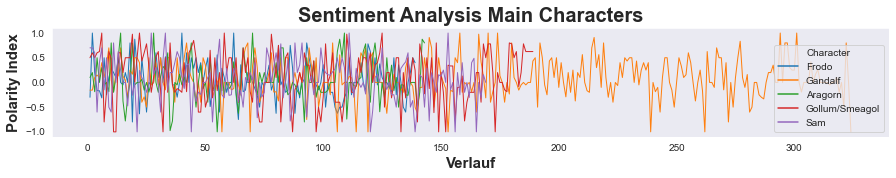

In [83]:
# Plot sentiment analysis for all characters
plt.figure(figsize=(15,2))
all_characters_sa_lineplot = sns.lineplot(x="Number", y="Polarity", linewidth=1,
             hue="Character",
             data=all_characters_sa_df)
all_characters_sa_lineplot.set_title("Sentiment Analysis Main Characters", fontsize=20, fontweight="bold")
all_characters_sa_lineplot.set_xlabel("Verlauf", fontsize=15, fontweight="bold")
all_characters_sa_lineplot.set_ylabel("Polarity Index", fontsize=15, fontweight="bold")

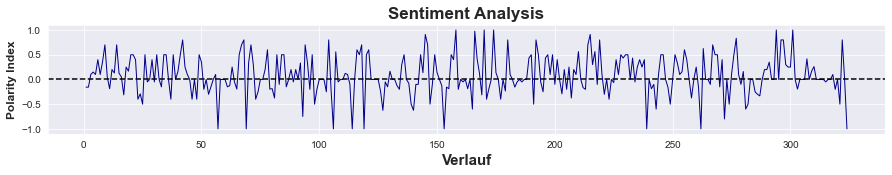

In [114]:
# Plot sentiment analysis Gandalf
gandalf_sa_lineplot = make_line_plot(gandalf_sa_df)

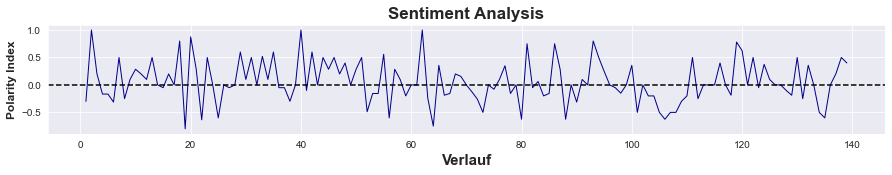

In [115]:
# Plot sentiment analysis Frodo
make_line_plot(frodo_sa_df)

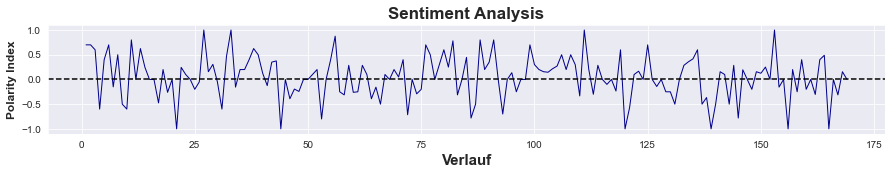

In [116]:
# Plot sentiment analysis Sam
make_line_plot(sam_sa_df)

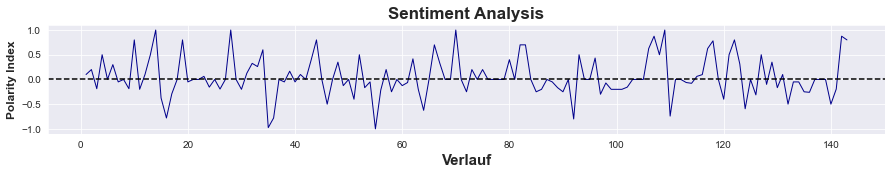

In [118]:
# Plot sentiment analysis Aragorn
make_line_plot(aragorn_sa_df)

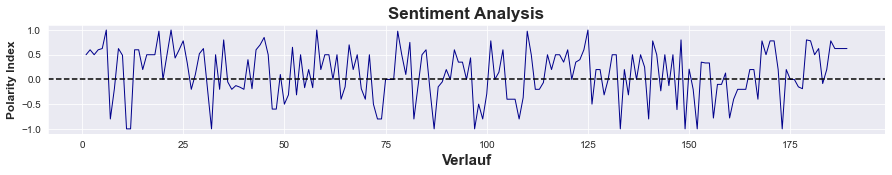

In [117]:
# Plot sentiment analysis Gollum/Smeagol
make_line_plot(gollum_smeagol_sa_df)